# Simple Autoencoder to perform PCA task

In this notebook we will implement an autoencoder which does a PCA and compare it to the PCA in the first notebook (see exploring_data.ipnb). 

In [21]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
layers = keras.layers

We load the data and split them into train, validation and test set. 

In [22]:
from sklearn.model_selection import train_test_split

gen = np.loadtxt("qcs_gen10000.txt", delimiter=",")


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

gen = StandardScaler().fit_transform(gen)

Our aim is to build a full autoencoder which produces a copy () of the original input. We can then use the encoder part to produce 2D-representations of the data. 

In [23]:
"""
activation = "relu"
regularizer = keras.regularizers.L1L2(l1=0.1, l2=0.1)

inputlayer = layers.Input(shape=X_train.shape[1])
e2 = layers.Dense(500, activation=activation)(inputlayer)
e3 = layers.Dense(50, activation=activation)(e2)

encoded1 = layers.Dense(10)(e3)
encoded2 = layers.Dense(2)(encoded1)

d01 = layers.Dense(10, activation=activation)(encoded2)
d02 = layers.Dense(50, activation=activation)(d01)
d1 = layers.Dense(50, activation=activation)(encoded1)
added = layers.Add()([d02, d1])
d2 = layers.Dense(500, activation=activation)(added)
outputlayer = layers.Dense(1101, activation=activation)(d2)

autoencoder = keras.models.Model(inputlayer, outputlayer)
pca = keras.Model(inputlayer,encoded2)

print(pca_autoencoder.summary())
"""

'\nactivation = "relu"\nregularizer = keras.regularizers.L1L2(l1=0.1, l2=0.1)\n\ninputlayer = layers.Input(shape=X_train.shape[1])\ne2 = layers.Dense(500, activation=activation)(inputlayer)\ne3 = layers.Dense(50, activation=activation)(e2)\n\nencoded1 = layers.Dense(10)(e3)\nencoded2 = layers.Dense(2)(encoded1)\n\nd01 = layers.Dense(10, activation=activation)(encoded2)\nd02 = layers.Dense(50, activation=activation)(d01)\nd1 = layers.Dense(50, activation=activation)(encoded1)\nadded = layers.Add()([d02, d1])\nd2 = layers.Dense(500, activation=activation)(added)\noutputlayer = layers.Dense(1101, activation=activation)(d2)\n\nautoencoder = keras.models.Model(inputlayer, outputlayer)\npca = keras.Model(inputlayer,encoded2)\n\nprint(pca_autoencoder.summary())\n'

In [24]:
activation = "linear"
regularizer = keras.regularizers.L1L2(l1=0.1, l2=0.1)

inputlayer = layers.Input(shape=train.shape[1])
e2 = layers.Dense(500, activation=activation)(inputlayer)
e3 = layers.Dense(50, activation=activation)(e2)
e4 = layers.Dense(10)(e3)

encoded = layers.Dense(2)(e4)

d1 = layers.Dense(10, activation=activation)(encoded)
d2 = layers.Dense(50, activation=activation)(d1)
d3 = layers.Dense(500, activation=activation)(d2)
outputlayer = layers.Dense(1101, activation=activation)(d2)

autoencoder = keras.models.Model(inputlayer, outputlayer)
pca = keras.Model(inputlayer,encoded)

print(autoencoder.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1101)]            0         
_________________________________________________________________
dense_24 (Dense)             (None, 500)               551000    
_________________________________________________________________
dense_25 (Dense)             (None, 50)                25050     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_29 (Dense)             (None, 50)                550 

In [25]:
#Visualisierung vom Model 
keras.utils.plot_model(autoencoder, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [26]:
autoencoder.compile(optimizer=keras.optimizers.Adam(0.001), loss='mse')

earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)
rl_on_plateau= keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.67, patience=2,
                                                 verbose=1, min_lr=1e-5)

In [27]:
results= autoencoder.fit(train, train, epochs=50, batch_size=256, validation_split=0.1, verbose=1)#, callbacks=[earlystopping, rl_on_plateau])

Train on 7200 samples, validate on 800 samples
Epoch 1/50
7200/7200 [==============================] - 1s 102us/sample - loss: 1.0962 - val_loss: 0.2376
Epoch 2/50
7200/7200 [==============================] - 0s 47us/sample - loss: 0.2364 - val_loss: 0.2176
Epoch 3/50
7200/7200 [==============================] - 0s 46us/sample - loss: 0.2007 - val_loss: 0.1766
Epoch 4/50
7200/7200 [==============================] - 0s 46us/sample - loss: 0.1391 - val_loss: 0.1073
Epoch 5/50
7200/7200 [==============================] - 0s 46us/sample - loss: 0.1235 - val_loss: 0.1025
Epoch 6/50
7200/7200 [==============================] - 0s 47us/sample - loss: 0.1025 - val_loss: 0.0997
Epoch 7/50
7200/7200 [==============================] - 0s 45us/sample - loss: 0.1017 - val_loss: 0.0997
Epoch 8/50
7200/7200 [==============================] - 0s 47us/sample - loss: 0.1015 - val_loss: 0.0996
Epoch 9/50
7200/7200 [==============================] - 0s 48us/sample - loss: 0.1016 - val_loss: 0.0998
Epoch 1

In [28]:
#autoencoder.save("pca_autoencoder.h5")

In [29]:
spectra_autoencoder = autoencoder.predict(test)

Text(0, 0.5, 'principal component 2')

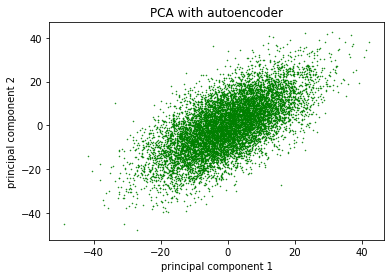

In [30]:
import matplotlib.pyplot as plt

encoded = pca.predict(gen)
#https://blog.keras.io/building-autoencoders-in-keras.html für die Idee wie man den encoder separiert hat
#print(encoded)
for i in range(len(encoded)):
    plt.plot(encoded[i][0], encoded[i][1], 'go', markersize = 0.5)
plt.title("PCA with autoencoder")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_std = StandardScaler().fit_transform(gen)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 2', 'principal component 3'])

xaxis = list(principalDf["principal component 2"])
yaxis = list(principalDf["principal component 3"])

plt.plot(xaxis, yaxis, 'go', markersize= 0.5)
plt.title("PCA for generated samples")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

ValueError: Shape of passed values is (10000, 3), indices imply (10000, 2)

The axis scaling is 